In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.applications import ResNet50
import os
from sklearn.metrics import roc_curve, roc_auc_score
import cv2
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, TimeDistributed, LSTM, Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,MaxPooling2D,Attention,Conv2D,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [2]:
train_path= r"C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\Data_for_deepfake\DatasetForModelTraining\train"
test_path=r"C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\Data_for_deepfake\DatasetForModelTraining\test"
val_path=r"C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\Data_for_deepfake\DatasetForModelTraining\val"

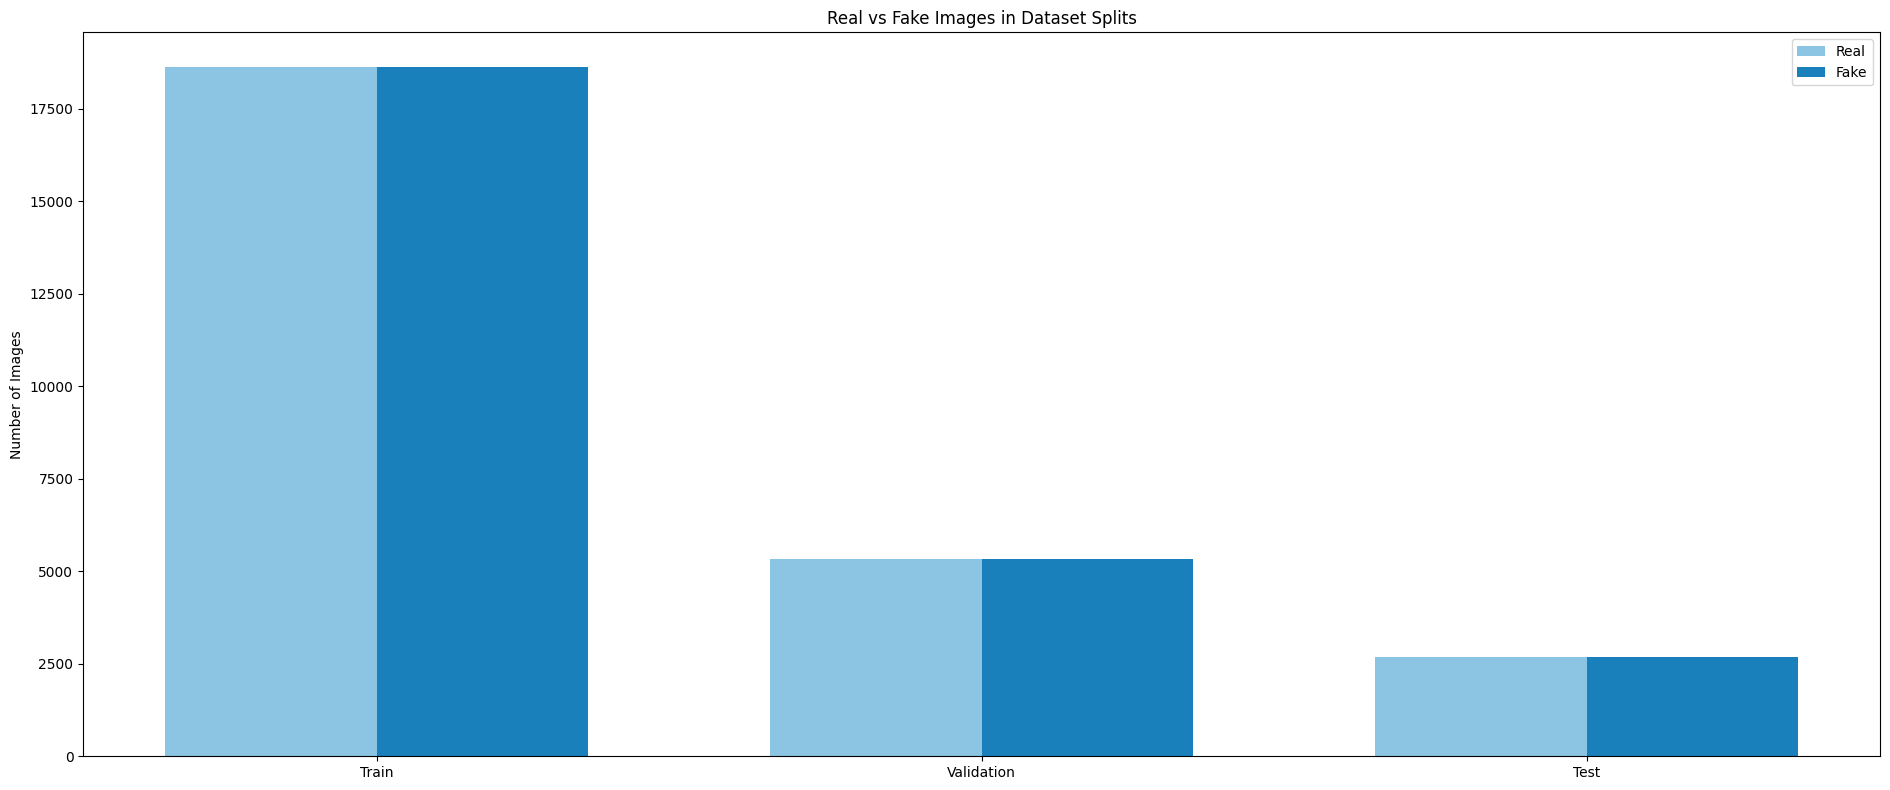

In [7]:
import os
import matplotlib.pyplot as plt

def count_images(base_path):
    counts = {}
    for label in ['Real', 'Fake']:
        folder = os.path.join(base_path, label)
        counts[label] = len([file for file in os.listdir(folder) if file.endswith(('.jpg', '.png'))])
    return counts

# Count images
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

# Data for plotting
labels = ['Train', 'Validation', 'Test']
real = [train_counts['Real'], val_counts['Real'], test_counts['Real']]
fake = [train_counts['Fake'], val_counts['Fake'], test_counts['Fake']]

x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(19, 8))
plt.bar([i - bar_width/2 for i in x], real, width=bar_width, label='Real', color= '#8cc5e3' )
plt.bar([i + bar_width/2 for i in x], fake, width=bar_width, label='Fake', color= '#1a80bb' )

plt.xticks(x, labels)
plt.ylabel("Number of Images")
plt.title("Real vs Fake Images in Dataset Splits")
plt.legend()
plt.tight_layout()
plt.show()


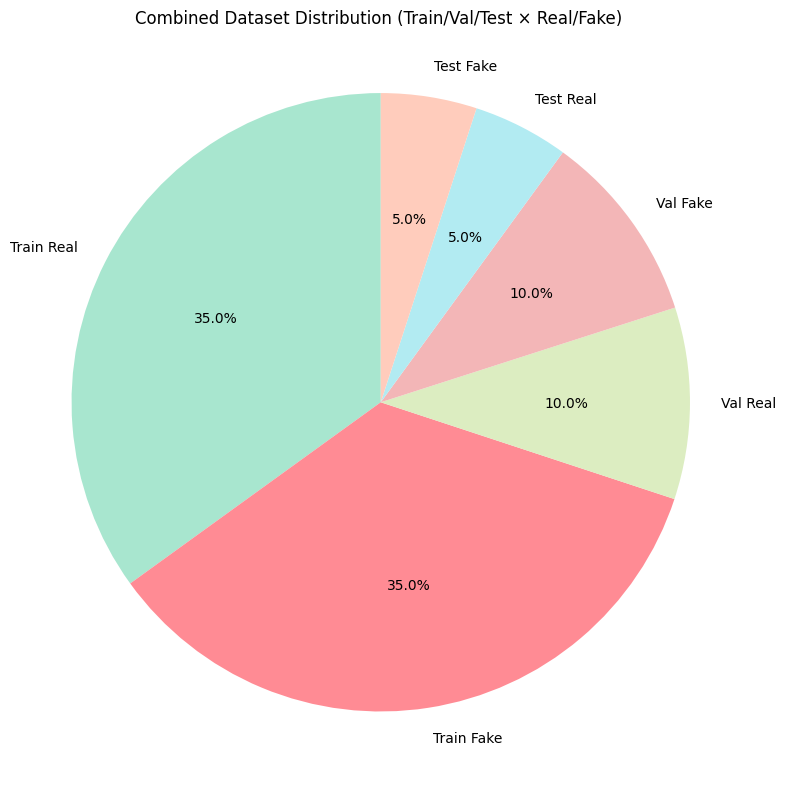

In [5]:
import matplotlib.pyplot as plt

def plot_combined_pie(train_counts, val_counts, test_counts):
    # Combine the data
    combined_data = {
        'Train Real': train_counts['Real'],
        'Train Fake': train_counts['Fake'],
        'Val Real': val_counts['Real'],
        'Val Fake': val_counts['Fake'],
        'Test Real': test_counts['Real'],
        'Test Fake': test_counts['Fake'],
    }

    labels = list(combined_data.keys())
    sizes = list(combined_data.values())

    # Soft/light pastel-style colors
    colors = [
        '#a8e6cf',  # light green
        '#ff8b94',  # light red
        '#dcedc1',  # lighter green
        '#f3b6b7',  # soft pink
        '#b2ebf2',  # light blue
        '#ffccbc'   # peach
    ]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title("Combined Dataset Distribution (Train/Val/Test × Real/Fake)")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Call it
plot_combined_pie(train_counts, val_counts, test_counts)


Displaying 5 random real images:


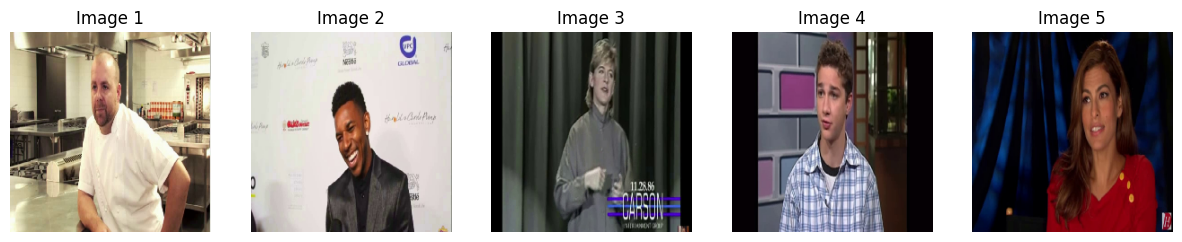

Displaying 5 random fake images:


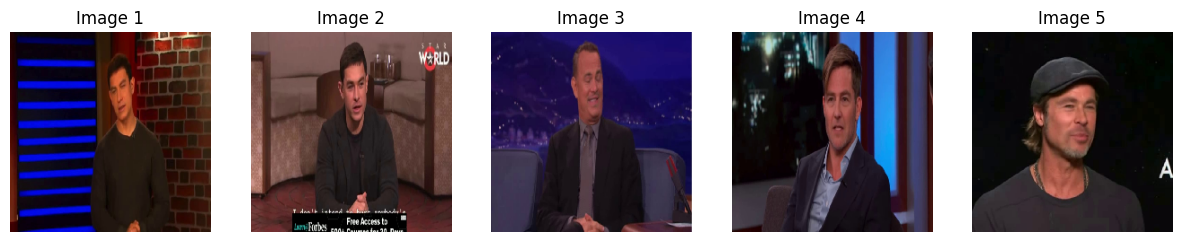

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
train_real_path = os.path.join(train_path, "Real")
train_fake_path = os.path.join(train_path, "Fake")

# Define a function to display random images from a folder
def display_random_images_from_folder(folder_path, n=5):
    # Get a list of all image files in the folder
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))]
    
    # Randomly choose n images
    chosen_files = np.random.choice(image_files, n, replace=False)
    
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    
    for i, img_file in enumerate(chosen_files):
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=(224, 224))  # Resize to match model input
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    plt.show()

# Display 5 random real images
print("Displaying 5 random real images:")
display_random_images_from_folder(train_real_path, 5)

# Display 5 random fake images
print("Displaying 5 random fake images:")
display_random_images_from_folder(train_fake_path, 5)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

# --- Preprocessing for Xception ---
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# --- Data Generators with Categorical Labels ---
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'  # Change to categorical for one-hot encoding
)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Change to categorical for one-hot encoding
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Change to categorical for one-hot encoding
    shuffle=False  # No shuffle for evaluation
)

Found 37260 images belonging to 2 classes.
Found 10680 images belonging to 2 classes.
Found 5340 images belonging to 2 classes.


Augmentation preview for a real image:
Augmented Image - Min: 0.0, Max: 0.9950366020202637


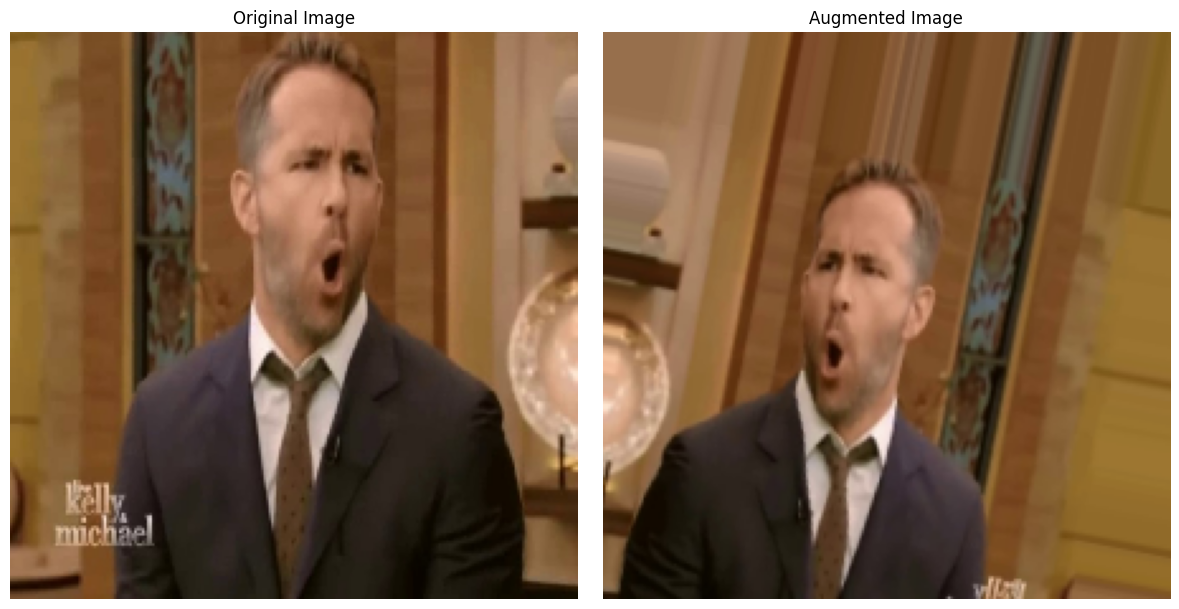

Augmentation preview for a fake image:
Augmented Image - Min: 0.0, Max: 1.0


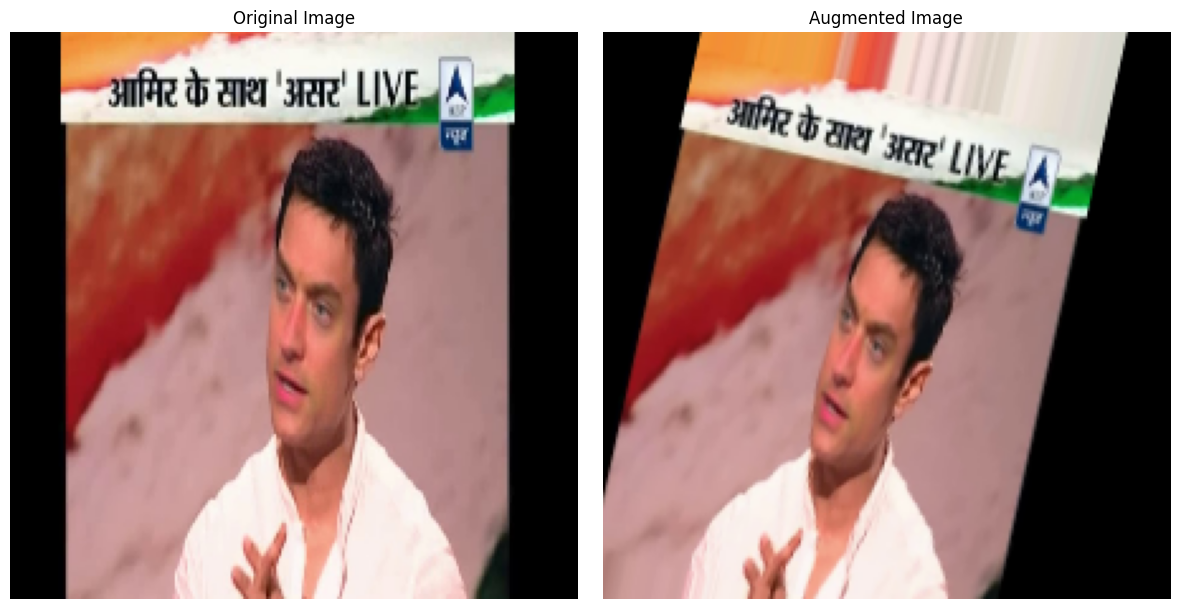

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Define augmentation generator FIRST
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Function now accepts datagen as argument
def show_before_after_augmentation(img_path, datagen):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Make it a batch of 1
    
    # Flow from generator
    it = datagen.flow(x, batch_size=1)
    
    # Plot original and augmented images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the original image
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    
    # Generate and plot augmented image
    aug_img = next(it)[0]
    
    # Debugging: Check the min/max values of the augmented image
    print(f"Augmented Image - Min: {np.min(aug_img)}, Max: {np.max(aug_img)}")
    
    # Scale back to [0, 255] for proper display
    aug_img = (aug_img * 255).astype('uint8')
    
    # Display the augmented image
    axes[1].imshow(aug_img)
    axes[1].axis('off')
    axes[1].set_title('Augmented Image')
    
    plt.tight_layout()
    plt.show()


# Your image folder paths
train_real_path = r"C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\Data_for_deepfake\DatasetForModelTraining\train\Real"
train_fake_path = r"C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\Data_for_deepfake\DatasetForModelTraining\train\Fake"

# Select random images
random_real_image = np.random.choice([f for f in os.listdir(train_real_path) if f.endswith(('.jpg', '.png'))])
random_fake_image = np.random.choice([f for f in os.listdir(train_fake_path) if f.endswith(('.jpg', '.png'))])

print("Augmentation preview for a real image:")
show_before_after_augmentation(os.path.join(train_real_path, random_real_image), train_datagen)

print("Augmentation preview for a fake image:")
show_before_after_augmentation(os.path.join(train_fake_path, random_fake_image), train_datagen)


In [5]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained Xception base (frozen)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom layers on top of the pre-trained base
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)  # Add dropout
x = Dense(32, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Use softmax for binary classification (2 classes)

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [7]:
 
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks for early stopping, model checkpoint, and reduce learning rate
checkpoint = ModelCheckpoint(
    filepath=r'C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\models\XceptionSoftmax.h5',  
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [10]:
with tf.device('/GPU:1'):
    history = model.fit(
        training_set,                # ✅ your custom training generator
        epochs=30,
        validation_data=val_set, # ✅ your custom validation generator
        callbacks=[early_stopping, checkpoint]
    )


Epoch 1/30
583/583 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.6817
Epoch 1: val_loss improved from inf to 0.52368, saving model to C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\models\XceptionSoftmax.h5
583/583 [==============================] - 480s 805ms/step - loss: 0.5894 - accuracy: 0.6817 - val_loss: 0.5237 - val_accuracy: 0.7528
Epoch 2/30
583/583 [==============================] - ETA: 0s - loss: 0.5122 - accuracy: 0.7514
Epoch 2: val_loss improved from 0.52368 to 0.48086, saving model to C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\models\XceptionSoftmax.h5
583/583 [==============================] - 455s 777ms/step - loss: 0.5122 - accuracy: 0.7514 - val_loss: 0.4809 - val_accuracy: 0.7830
Epoch 3/30
583/583 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.7728
Epoch 3: val_loss improved from 0.48086 to 0.47760, saving model to C:\Users\creat\Desktop\semesters\7th semester\deepfake_fyp1\models\Xce

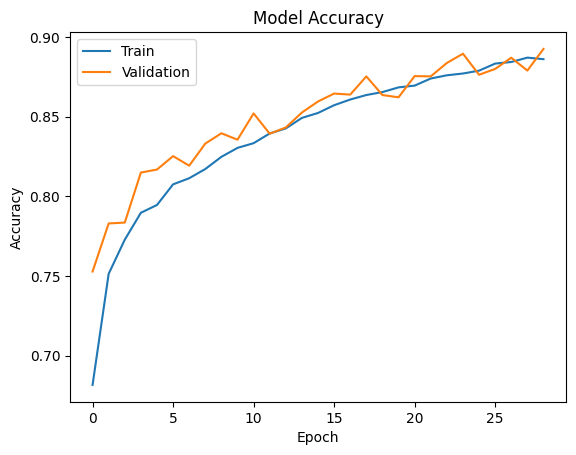

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

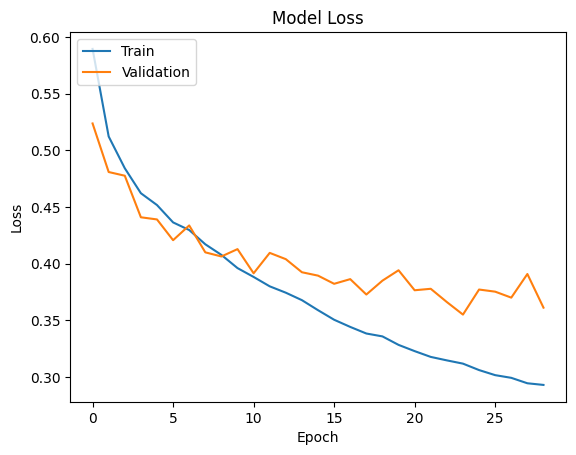

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Predict the classes using the test set
test_pred = model.predict(test_set)
test_pred_classes = np.round(test_pred)

# Get the true classes of the test set
test_true_classes = test_set.classes

167/167 [==============================] - 32s 189ms/step


167/167 [==============================] - 30s 178ms/step


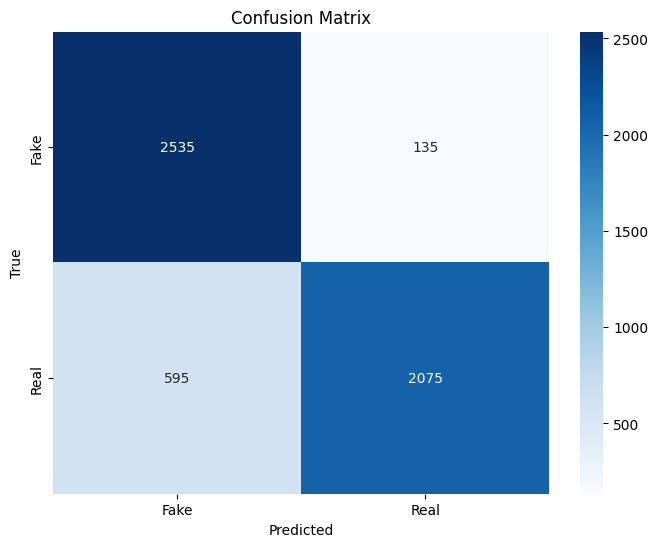

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get class predictions
test_pred = model.predict(test_set)
test_pred_classes = np.argmax(test_pred, axis=1)  # convert probabilities to class labels

# True classes
test_true_classes = test_set.classes  # already in correct format

# Compute confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [16]:
evaluation = model.evaluate(test_set)

167/167 [==============================] - 32s 189ms/step - loss: 0.3772 - accuracy: 0.8590


In [17]:
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

Test Accuracy: 85.90%


In [19]:
#Classification report
report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.8099    0.9494    0.8741      2670
     Class 1     0.9389    0.7772    0.8504      2670

    accuracy                         0.8633      5340
   macro avg     0.8744    0.8633    0.8623      5340
weighted avg     0.8744    0.8633    0.8623      5340



167/167 [==============================] - 30s 178ms/step


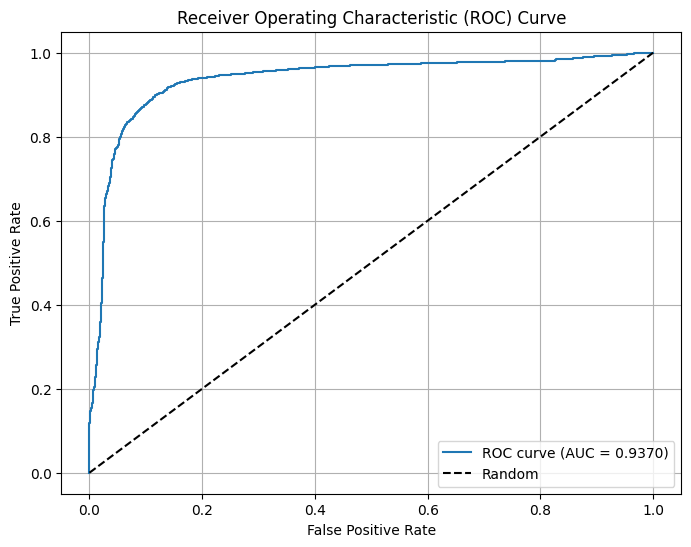

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
test_pred = model.predict(test_set)[:, 1]  # shape: (n_samples,)

# True class labels (0 or 1)
test_true_classes = test_set.classes  # shape: (n_samples,)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_true_classes, test_pred)
auc = roc_auc_score(test_true_classes, test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



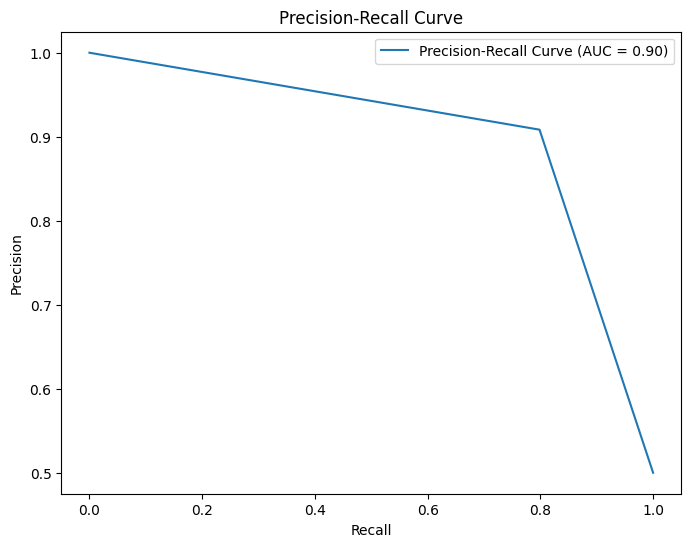

In [20]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(test_true_classes, test_pred_classes)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [21]:
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_true_classes, test_pred_classes).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Sensitivity (True Positive Rate): 0.7985
Specificity (True Negative Rate): 0.9195


In [22]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes and test_true_classes as described earlier

# Calculate F1 score for the test classes
f1 = f1_score(test_true_classes, test_pred_classes)
# Calculate accuracy to get error rate
accuracy = accuracy_score(test_true_classes, test_pred_classes)
error_rate = 1 - accuracy
# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5

# Calculate F-measure
f_measure = 2 * ((sensitivity * specificity) / (sensitivity + specificity))

print(f'F1 Score: {f1:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'G-mean: {g_mean:.4f}')
print(f'F-measure: {f_measure:.4f}')

F1 Score: 0.8499
Error Rate: 0.1410
G-mean: 0.8569
F-measure: 0.8547


In [24]:
# Save the model
model_save_path = "XceptionDeep_Fake.h5"
model.save(model_save_path)
print("Model saved at:", model_save_path)


Model saved at: XceptionDeep_Fake.h5
